In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

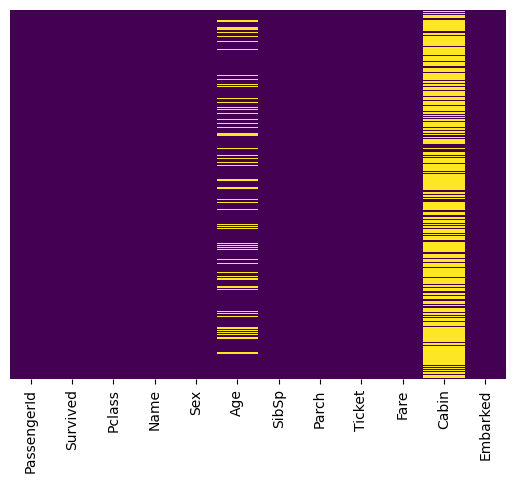

In [5]:
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [6]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

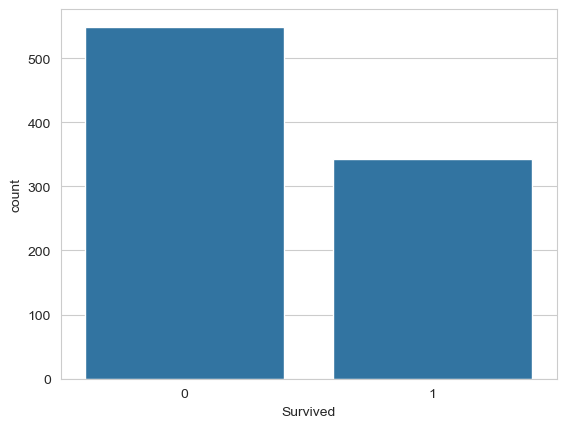

In [7]:
sns.countplot(x= 'Survived', data= train)

<Axes: xlabel='Survived', ylabel='count'>

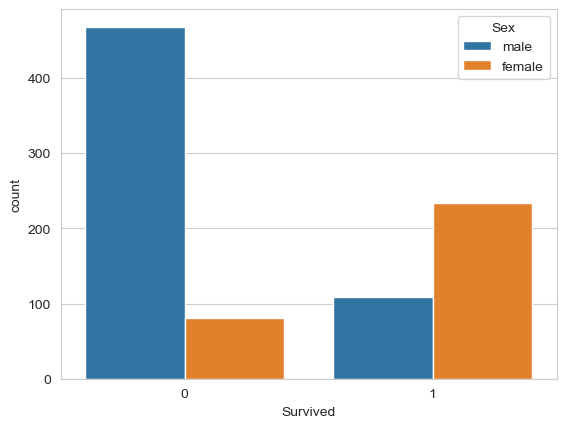

In [8]:
sns.countplot(x= 'Survived', hue= 'Sex', data= train)

<Axes: xlabel='Survived', ylabel='count'>

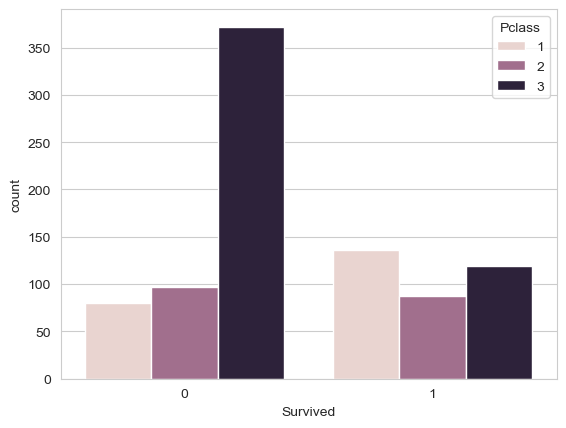

In [9]:
sns.countplot(x= 'Survived', hue= 'Pclass', data= train)

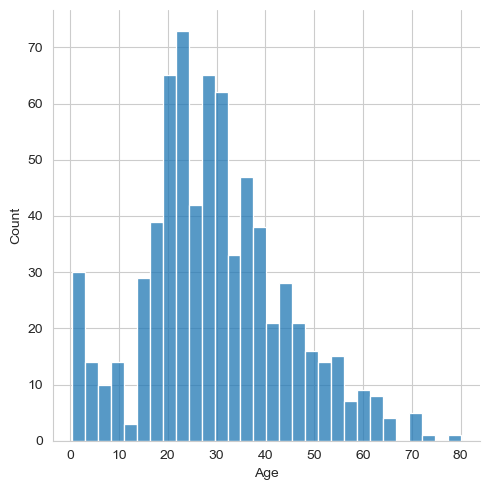

In [10]:
sns.displot(train['Age'].dropna(), kde= False, bins=30)

<Axes: ylabel='Frequency'>

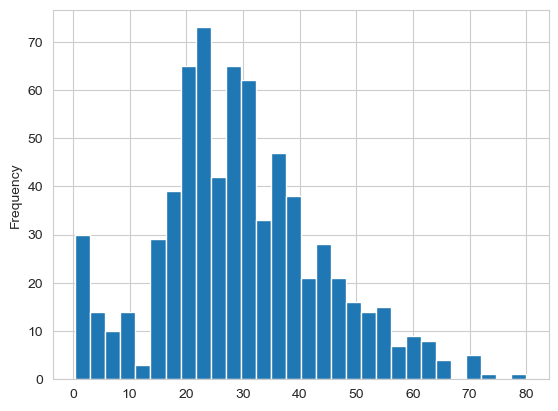

In [11]:
train['Age'].plot.hist(bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

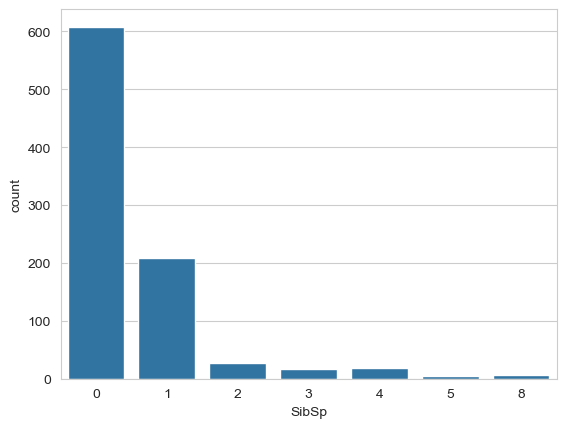

In [13]:
sns.countplot(x='SibSp', data=train)

<Axes: >

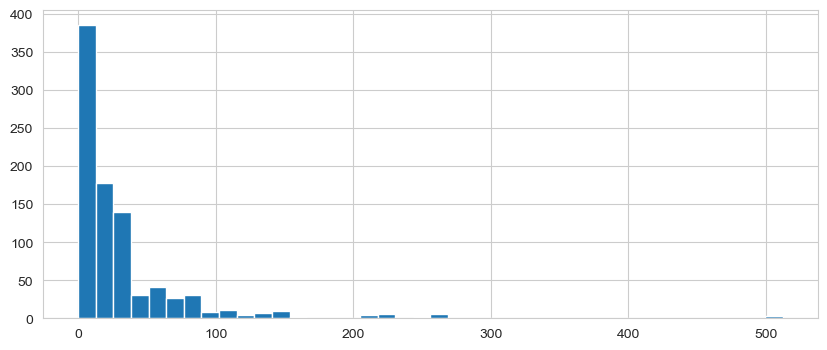

In [14]:
train['Fare'].hist(bins=40, figsize=(10, 4))

In [15]:
import cufflinks as cf
cf.go_offline()

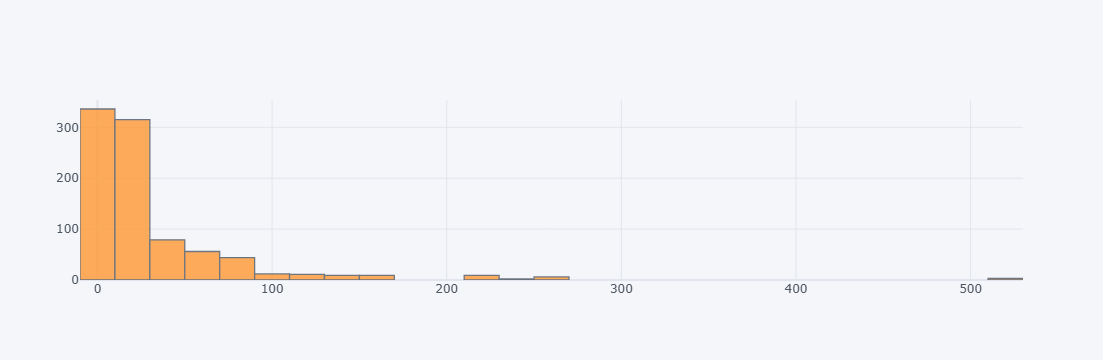

In [16]:
train['Fare'].iplot(kind='hist', bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

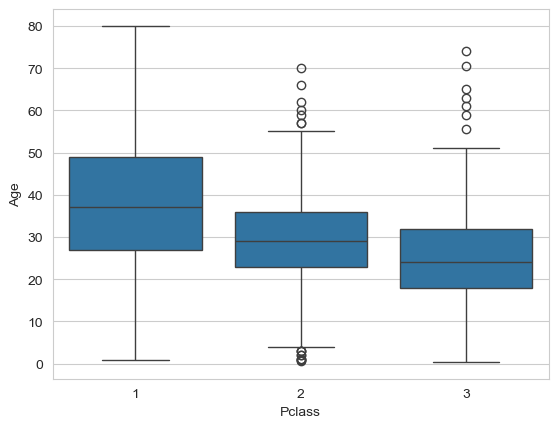

In [17]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [18]:
mean_ages= train.groupby('Pclass')['Age'].mean()

def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        return mean_ages[Pclass]
    else:
        return Age

In [19]:
train['Age']= train[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\fatem\AppData\Local\Temp\ipykernel_16476\2227612594.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\fatem\AppData\Local\Temp\ipykernel_16476\2227612594.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

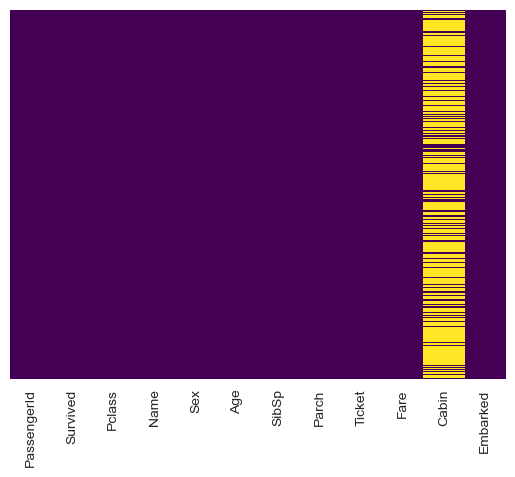

In [20]:
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [21]:
train.drop('Cabin', axis=1, inplace= True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

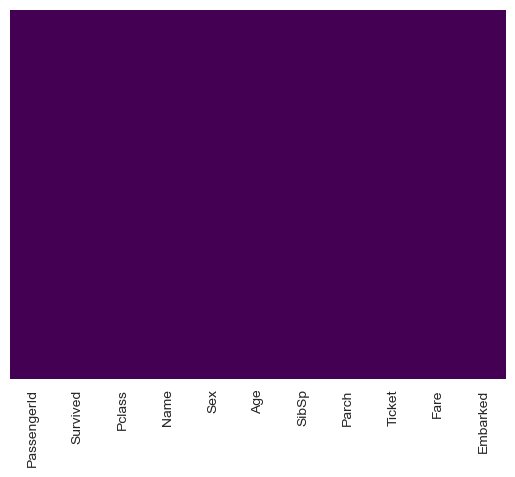

In [23]:
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [24]:
train.dropna(inplace=True)

<Axes: >

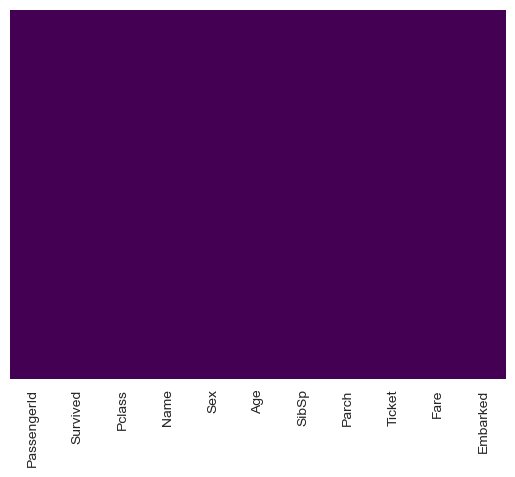

In [25]:
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [26]:
sex= pd.get_dummies(train['Sex'], drop_first=True, dtype=float)
#Whether to get k-1 dummies out of k categorical levels by removing the first level.

In [27]:
embark= pd.get_dummies(train['Embarked'], drop_first=True, dtype=float)

In [28]:
embark.head()

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [29]:
train= pd.concat([train.reset_index(drop=True),
                   sex.reset_index(drop=True),
                   embark.reset_index(drop=True)], axis=1)

In [30]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0


In [31]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [32]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [34]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [35]:
#X= train.drop('Survived', axis=1)
#y= train['Survived']

In [36]:
#X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [45]:
#y.tail()

884    0
885    1
886    0
887    1
888    0
Name: Survived, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [55]:
#X_train, y_train, X_test, y_test= train_test_split (X, y, test_size=0.3, random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel= LogisticRegression()

In [61]:
logmodel.fit(X_train, y_train)

C:\Users\fatem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [63]:
predictions= logmodel.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [73]:
print(confusion_matrix(y_test,predictions))

[[149  14]
 [ 31  73]]
